# Project - Recommendation Systems - Smart Phones

## CONTEXT
India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.
    
## DATA DESCRIPTION
* author : name of the person who gave the rating
* country : country the person who gave the rating belongs to
* date : date of the rating
* domain: website from which the rating was taken from
* extract: rating content
* language: language in which the rating was given
* product: name of the product/mobile phone for which the rating was given
* score: average rating for the phone
* score_max: highest rating given for the phone
* source: source from where the rating was taken

## PROJECT OBJECTIVE
To build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively..



# (1) Import Python Libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')
import ipywidgets as widgets
from IPython.display import clear_output,display, Markdown, Latex
import itertools
import pycountry as pc
from tqdm import tqdm

import random
from sklearn.model_selection import train_test_split as sk_train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error


from surprise import Reader, Dataset
from surprise.model_selection import  GridSearchCV, RandomizedSearchCV
from surprise import SVD, KNNBasic, KNNWithMeans,accuracy

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


pd.set_option('display.max_colwidth', 500)
plt.rcParams["figure.figsize"] = (20,8)



In [88]:
import sklearn
print(sns.__version__)
print(sklearn.__version__)

0.11.1
0.24.1


# (2) Read and load datafiles

In [12]:
df1 = pd.read_csv("phone_user_review_file_1.csv",encoding="ISO-8859-1",error_bad_lines=False)
df2 = pd.read_csv("phone_user_review_file_2.csv",encoding="ISO-8859-1",error_bad_lines=False)
df3 = pd.read_csv("phone_user_review_file_3.csv",encoding="ISO-8859-1",error_bad_lines=False)
df4 = pd.read_csv("phone_user_review_file_4.csv",encoding="ISO-8859-1",error_bad_lines=False)
df5 = pd.read_csv("phone_user_review_file_5.csv",encoding="ISO-8859-1",error_bad_lines=False)
df6 = pd.read_csv("phone_user_review_file_6.csv",encoding="ISO-8859-1",error_bad_lines=False)

In [13]:
df1.shape , df2.shape , df3.shape , df4.shape , df5.shape, df6.shape

((374910, 11),
 (114925, 11),
 (312961, 11),
 (98284, 11),
 (350216, 11),
 (163837, 11))

#### Merge all data frames into one

In [14]:
df = pd.concat([df1,df2,df3,df4,df5,df6],axis=0,ignore_index=True)

# (3) Descriptive Analytics

In [15]:
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,"As a diehard Samsung fan who has had every Samsung phone since before the S series started, this has been my favorite upgrade so far. I am amazed at some of the reviews and think people may just have a defective device that needs to be replaced. The battery life is amazing.",CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth and beautiful I highly recommend the phone you will not regret getting this phone.,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sluggish for the few apps that I have installed. Samsung wants to vacuum all of your data with their apps that requires more access than needed. What else is new.,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unlocked (GSM + CDMA, US WARRANTY) (Orchid Gray)"
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,"Never disappointed. One of the reasons I've been a long Samsung (product) consumer, they're ability to impress me with each product release. I've owned, or maintained, all Samsung smartphones starting with the S4 and the S8 is the best one yet.",Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people that have carried their phone in their pocket without problems until the S8. Day one screen has crack from being in my pocket. Bluetooth on my 1st trip struggles to stay connected. Good news.....battery life is great and lots of great features.,S Ate Mine,Samsung Galaxy S8


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB


#### Observations:
1. There are almost 1.4M records.
2. Except for `score` and `score_max` that have `float64` as datatype, all other columns are of datatype `object`.

In [17]:
df.describe()

,score,score_max
count,1.351644e+06,1351644.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


#### Observations:
1. Rating ranges from `0.2` to `10` with an average of `8.0`.

# (4) Data Cleansing

## (4.1) Drop  Duplicates

In [18]:
df.duplicated(['score','author','product','date'],keep='last').sum()

79526

#### Observations:
1. There are `~79K` duplicate records.
2. Duplicates have been checked based on `score`, `author` ,`product` and `year`. This means that the same user might have purchased the same item at different point in time. Hence, retaining the last review would be appropriate.
3. Drop duplicates.

In [19]:
df.drop_duplicates(subset = ['score','author','product','date'],keep='last',inplace=True)
df.shape

(1335607, 11)

#### Observations:
1. After dropping duplicates there are now close to `1.3M` records.

## (4.2) Create another column `product_id` , `year` and `brand`.

In [20]:
df['product_id'] = df['phone_url'].apply(lambda x : x.split("/")[2])
df['year'] = df['date'].apply(lambda x : x.split("/")[2])
df['brand'] = df['product_id'].apply(lambda x : x.split('-')[0])
df.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product,product_id,year,brand
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,"As a diehard Samsung fan who has had every Samsung phone since before the S series started, this has been my favorite upgrade so far. I am amazed at some of the reviews and think people may just have a defective device that needs to be replaced. The battery life is amazing.",CarolAnn35,Samsung Galaxy S8,samsung-galaxy-s8,2017,samsung
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth and beautiful I highly recommend the phone you will not regret getting this phone.,james0923,Samsung Galaxy S8,samsung-galaxy-s8,2017,samsung
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sluggish for the few apps that I have installed. Samsung wants to vacuum all of your data with their apps that requires more access than needed. What else is new.,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unlocked (GSM + CDMA, US WARRANTY) (Orchid Gray)",samsung-galaxy-s8,2017,samsung
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,"Never disappointed. One of the reasons I've been a long Samsung (product) consumer, they're ability to impress me with each product release. I've owned, or maintained, all Samsung smartphones starting with the S4 and the S8 is the best one yet.",Buster2020,Samsung Galaxy S8 64GB (AT&T),samsung-galaxy-s8,2017,samsung
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people that have carried their phone in their pocket without problems until the S8. Day one screen has crack from being in my pocket. Bluetooth on my 1st trip struggles to stay connected. Good news.....battery life is great and lots of great features.,S Ate Mine,Samsung Galaxy S8,samsung-galaxy-s8,2017,samsung


In [21]:
df['product_id'].nunique() , df['product'].nunique() , df['brand'].nunique()

(5556, 61313, 166)

#### Observations:
1. There are `166` brand of mobile phones in the dataset.
2. There are `5556` models of phones.
2. Of these `5556` models there are about `61313` variants in total.

## (4.3) Drop some original features that are not significant

In [22]:
df.drop(['phone_url','date','extract','source','score_max'],axis=1,inplace=True)
df.head()

,lang,country,domain,score,author,product,product_id,year,brand
0,en,us,verizonwireless.com,10.0,CarolAnn35,Samsung Galaxy S8,samsung-galaxy-s8,2017,samsung
1,en,us,phonearena.com,10.0,james0923,Samsung Galaxy S8,samsung-galaxy-s8,2017,samsung
2,en,us,amazon.com,6.0,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unlocked (GSM + CDMA, US WARRANTY) (Orchid Gray)",samsung-galaxy-s8,2017,samsung
3,en,us,samsung.com,9.2,Buster2020,Samsung Galaxy S8 64GB (AT&T),samsung-galaxy-s8,2017,samsung
4,en,us,verizonwireless.com,4.0,S Ate Mine,Samsung Galaxy S8,samsung-galaxy-s8,2017,samsung


## (4.4) Check for `NaNs`

In [23]:
df.isna().sum()

lang              0
country           0
domain            0
score         56167
author        58408
product           1
product_id        0
year              0
brand             0
dtype: int64

#### Observations:
1. There are close `56K` and `58K` `NaNs` in `score` and `author` respectively.

### (4.4.1) Replace NaNs in `author` with randomly generated users from `Unknown_1` to `Unknown_10`

In [24]:
df ['author'] = df['author'].apply(lambda x : 'Unknown_'+str(random.randint(1,10)) if pd.isnull(x) else x)
df.isna().sum()

lang              0
country           0
domain            0
score         56167
author            0
product           1
product_id        0
year              0
brand             0
dtype: int64

### (4.4.2) Replace NaNs in `score` with means of either `product_id` .

#### Create Lookup tables by product_id and author.

In [25]:
item_score_lookup = df.groupby(by='product_id',as_index=True)[['score']].mean().sort_values(by='score',ascending=False)
# user_score_lookup = df.groupby(by='author',as_index=True)[['score']].mean().sort_values(by='score',ascending=False)
display(Markdown("#### ***Item to Score Lookup***"))
display(item_score_lookup)
# display(Markdown("#### ***User to Score Lookup***"))
# display(user_score_lookup)

#### ***Item to Score Lookup***

,score
product_id,
benq-t51,10.0
samsung-i187,10.0
motorola-grasp,10.0
inew-v1,10.0
motorola-i836,10.0
...,...
orange-spv-c600,NaN
samsung-sch-r580,NaN
thuraya-sg-2520,NaN


#### Create a function to impute NaNs with means from lookup table

In [26]:
def lookup_score(score,item,user):
    if pd.isna(score) :
        item_ret = round(item_score_lookup.loc[item]['score'],1)
        return item_ret
    else:
        return score
    

In [27]:
df['score'] = df.apply(lambda x : lookup_score(x['score'],x['product_id'],x['author']),axis=1)

In [28]:
df.isna().sum()

lang           0
country        0
domain         0
score         57
author         0
product        1
product_id     0
year           0
brand          0
dtype: int64

#### Observations:
1. Even after imputing there are about 57 records with `score` as `NaN` and 1 record with `product` as `NaN`.
2. We will drop those values.

### (4.4.3) Dropping remaining `NaNs`.

In [29]:
df.dropna(inplace=True)
df.isna().sum()

lang          0
country       0
domain        0
score         0
author        0
product       0
product_id    0
year          0
brand         0
dtype: int64

## (4.5) Create another column to hold rating as category between 1 to 10.

In [30]:
df['score_bin'] = pd.cut(df['score'],bins=range(0,11),right=True,labels=range(1,11))
df[['score','score_bin']]

,score,score_bin
0,10.0,10
1,10.0,10
2,6.0,6
3,9.2,10
4,4.0,4
...,...,...
1415128,2.0,2
1415129,10.0,10
1415130,2.0,2
1415131,8.0,8


In [31]:
%run edafunc.py
catvar,contvar,stats_df = create_variable_list(df,10,stats=True)
stats_df

,Variable,Type,Categorical_Class,Uniques,N-Uniques
0,score_bin,Categorical,Multi,"[10, 6, 4, 8, 2, 7, 9, 5, 3, 1] Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]",10
1,score,Numeric,NaN,NaN,89
2,lang,Objects,NaN,NaN,22
3,country,Objects,NaN,NaN,42
4,domain,Objects,NaN,NaN,384
5,author,Objects,NaN,NaN,801090
6,product,Objects,NaN,NaN,61295
7,product_id,Objects,NaN,NaN,5541
8,year,Objects,NaN,NaN,20
9,brand,Objects,NaN,NaN,165


#### Summary frame for all columns and their data types

# (5) Exploratory Data Analysis

## (5.1) Distribution of Ratings

In [32]:
df.groupby(by='brand')['brand'].count().to_frame().rename(columns={'brand':'count'}).reset_index()

,brand,count
0,acer,4882
1,alcatel,15204
2,amazon,127
3,amoi,2
4,amplicom,72
...,...,...
160,yezz,49
161,yota,283
162,yu,1833
163,zopo,664


### **<u>Rating Distribution and Counts</u>** 

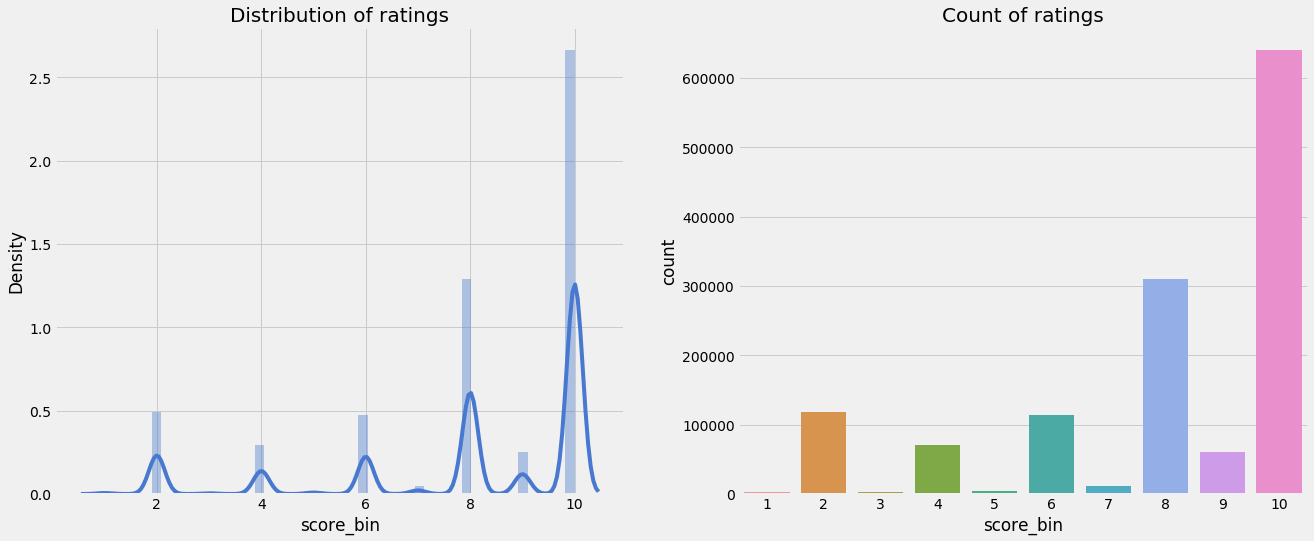

### **<u>Distribution of brand</u>** 

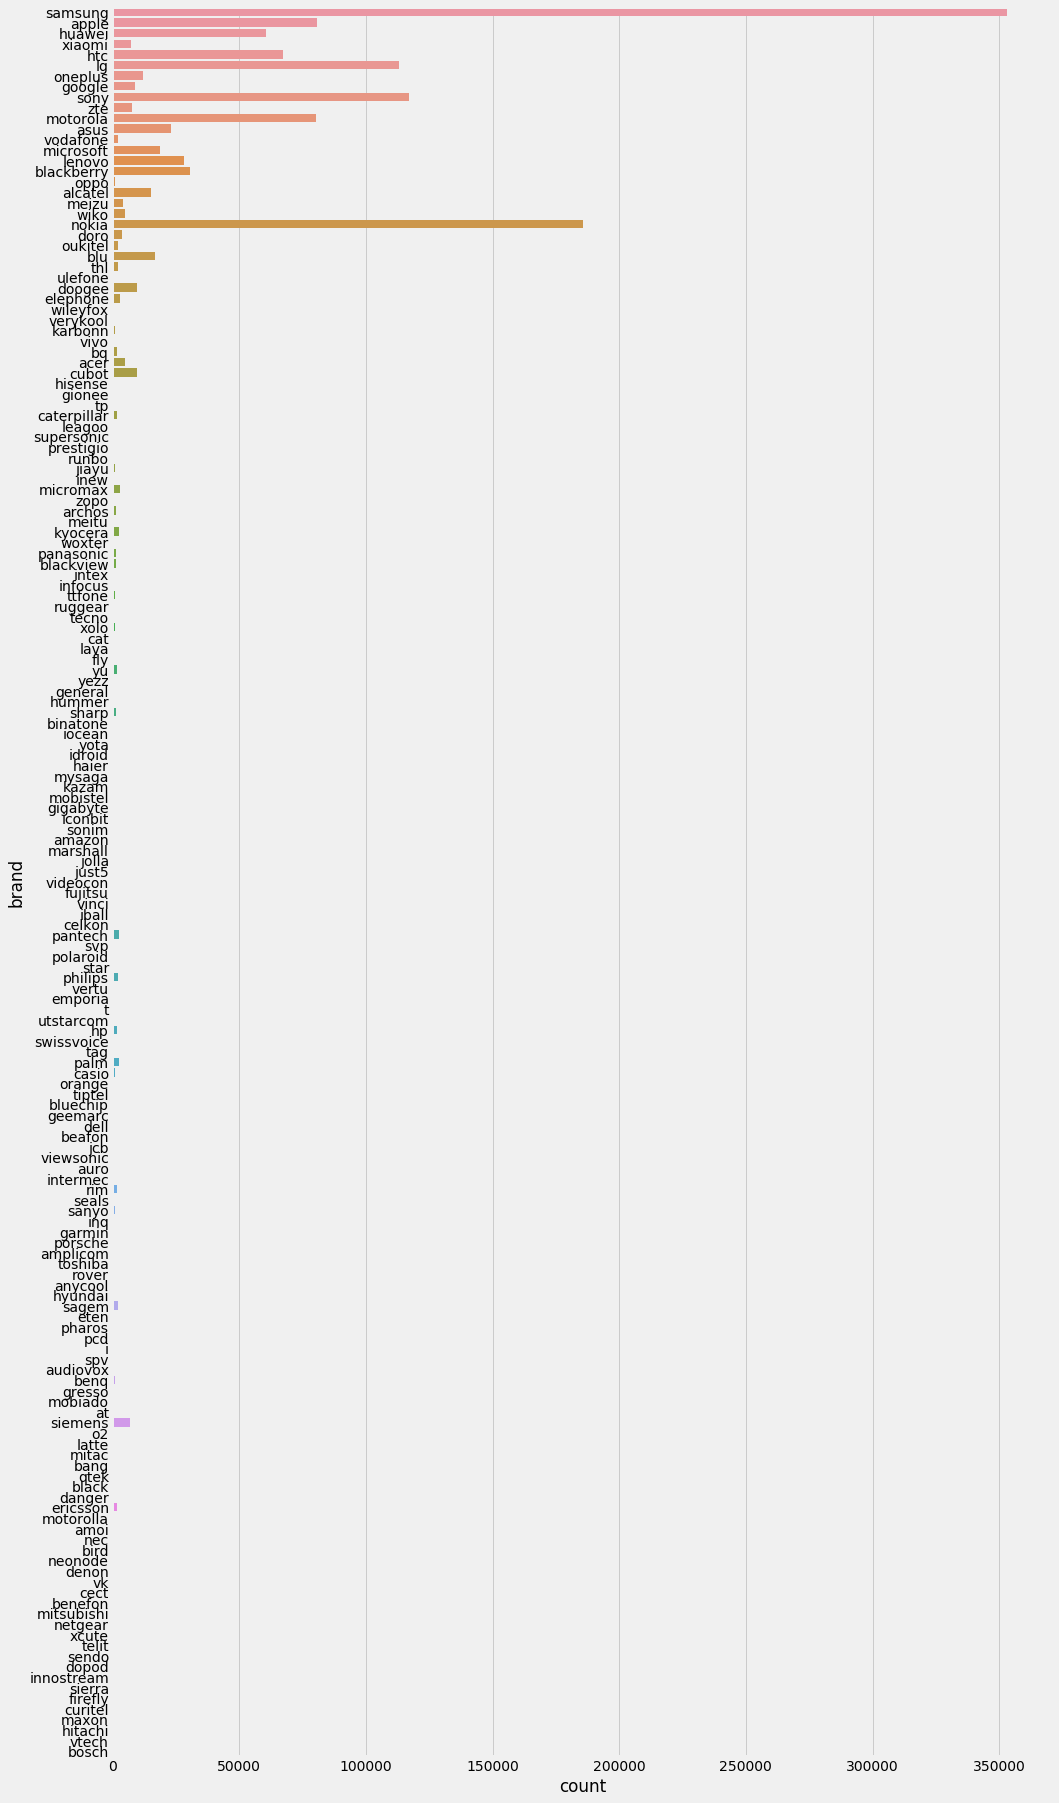

In [33]:
fig, ax = plt.subplots(1,2,figsize=(20,8)) 
display(Markdown("### **<u>Rating Distribution and Counts</u>** "))
sns.distplot(df['score_bin'],ax=ax[0]).set_title("Distribution of ratings",fontsize=20)
sns.countplot(df['score_bin'],ax=ax[1]).set_title("Count of ratings",fontsize=20)
plt.show()

display(Markdown("### **<u>Distribution of brand</u>** "))
fig, ax = plt.subplots(figsize=(15,30)) 
sns.countplot(y=df['brand'],orient='h')
plt.show()
# display(df.groupby(by='score_bin').count()[['product']])

#### Observations:
1. `score 10` are the highest and  `score 1,3 and 5` the least.
2. `Samsung`, `LG`, `Nokia`,`Sony` and  `Apple` have received maximum number of reviews.

## (5.2) Rating Trend

### **<u>Product Rating Trend</u>** 

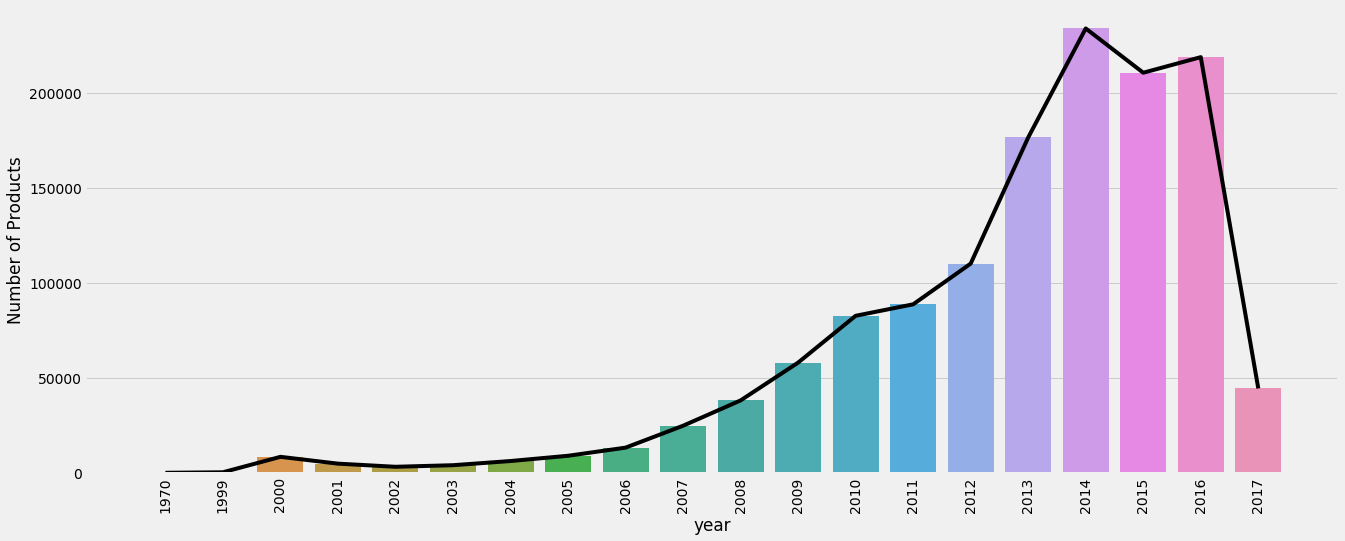

In [34]:
display(Markdown("### **<u>Product Rating Trend</u>** "))
sns.countplot(np.sort(df['year']))
sns.lineplot(x=df.groupby(by='year')['score_bin'].count().keys(),y=df.groupby(by='year')['score_bin'].count().values,color='k')
plt.xticks(rotation=90);
plt.ylabel("Number of Products")
plt.show()
# df.groupby(by='year')['score_bin'].count()


#### Observations:
1. The ratings are spread between `1999` to `2017` i.e 18 years. Somehow there are a couple of reviews from `1970` which could be discarded readily.
2. The number ratings increased significantly by almost `twice` between 2012 and 2014. This is the timeframe when Amazon expanded outside of USA into `India` and other emerging economies.
3. Also, the data seems to be incomplete for `2017`

## (5.3) Top-N e-commerce domains 

### **<u>Top 10 e-Commerce Websites</u>** 

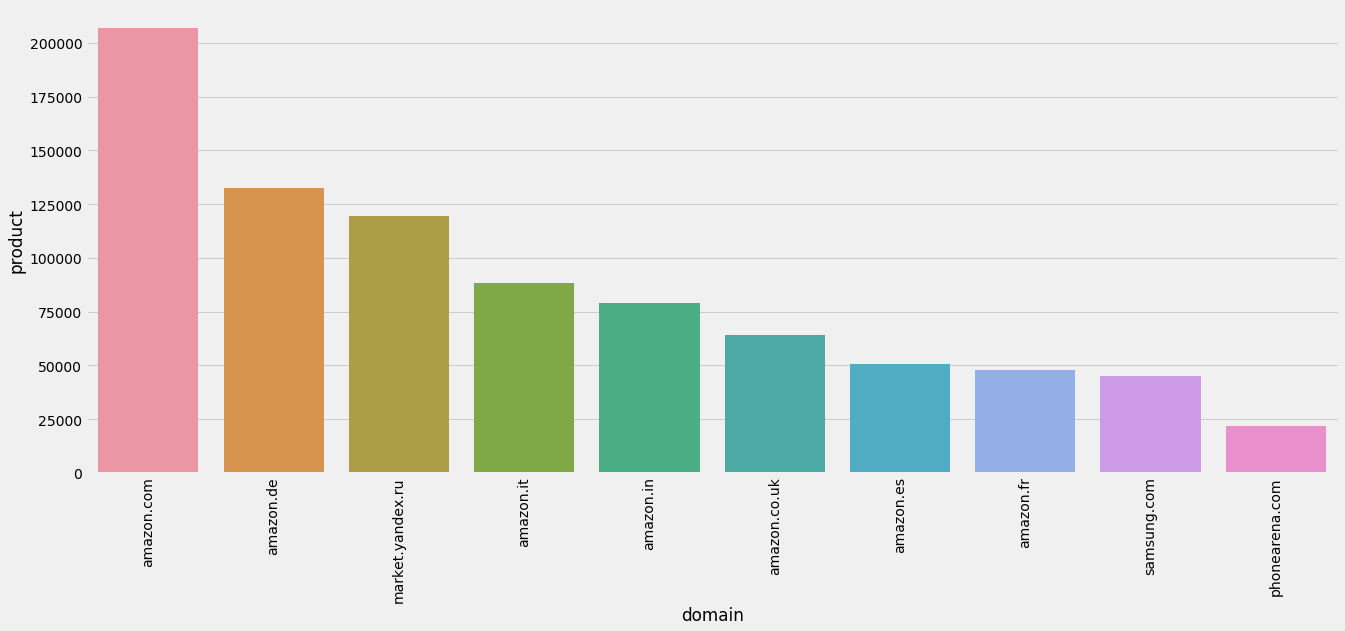

##### Total number of domains : 384 

In [35]:
top_n = 10
total_domain = df['domain'].nunique()
top_domain = df.groupby(by='domain',as_index=False)[['product']].count().sort_values(by='product',ascending=False).head(top_n)
display(Markdown(f"### **<u>Top {top_n} e-Commerce Websites</u>** "))
sns.barplot(data=top_domain,x='domain',y='product')
plt.xticks(rotation=90);
plt.show()
display(Markdown(f"##### Total number of domains : {total_domain} "))
# display(top_domain)

#### Observations:
1. There are altogether `384` domains.
2. `Amazon` as an e-commerce company figures most of the time.
3. `Amazon.com` which is a US domain has maximum ratings that also translates into sales.
4. `Amazon.in` figures at the `5th` place.

## (5.4) List of products with maximum score i.e `score 10`

In [36]:
top_products = df.groupby(by='product')[['score']].mean().sort_values(by='score',ascending=False)
top_products = top_products[top_products['score'] == 10] 
display(top_products)

,score
product,
Sim Free HTC 10 Mobile Phone - Glacier Silver,10.0
OtterBox Commuter Black Solid Case for BlackBerry Curve 9350/9360/9370 RBB4-CRV93-20-E4OTR,10.0
Samsung GT-S5550,10.0
BlackBerry Torch 9800 - Noir,10.0
"BlackBerry Torch 9800 - Smartphone - 3G - WCDMA (UMTS) / GSM - slider - touch screen, full keyboard - BlackBerry OS - black",10.0
...,...
APPLE iPhone 6+ 16 Go,10.0
"Motorola RAZR i Smartphone, Touchscreen da 10.9 cm (4.3 Pollici), Fotocamera 8 Megapixel, Memoria 8 GB, Micro USB, Android 4.1, Colore Nero [Germania]",10.0
Nokia Lumia 435 - Grey,10.0


#### Observations:
1. There are about `9.4K` prodcucts with maximum score across all domains.

## (5.5) Top 10 Users 

In [37]:
top_users = df.groupby(by='author')[['score']].count().sort_values(by='score',ascending=False).head(10)
top_users

,score
author,
Amazon Customer,33802
Cliente Amazon,15580
e-bit,6689
Unknown_4,5898
Unknown_7,5880
Unknown_6,5857
Unknown_9,5852
Unknown_5,5847
Unknown_3,5843


#### Observations:
1. `Amazon Customer` and `Cliente Amazon` are the top users across domains.

## (5.6) Products with more than 50 reviews

In [38]:
ratings_50 = pd.DataFrame({'Products':df['product'].value_counts().keys(), 'Count':df['product'].value_counts().values})
ratings_50[ratings_50['Count'] >= 50]

,Products,Count
0,Samsung Galaxy Express I8730,2366
1,"OnePlus 3 (Graphite, 64 GB)",2358
2,"Lenovo Vibe K4 Note (White,16GB)",2344
3,Nokia 5800 XpressMusic,2088
4,"Lenovo Vibe K4 Note (Black, 16GB)",2000
...,...,...
6420,"Nokia Lumia 520 - Smartphone libre Windows Phone (pantalla 4"", cÃ¡mara 5 Mp, 8 GB, 1 GHz, 512 MB RAM), rojo [importado]",50
6421,Apple iPhone 4s 8GB schwarz,50
6422,"Samsung Galaxy Note N7000 Smartphone (13.5 cm (5.3 pulgadas) HD Super AMOLED de pantalla t??ctil, c??mara de 8 MP, Android 2.3 OS)",50
6423,"Nokia Lumia 1520, Yellow 16GB (AT&T)",50


#### Observations:
1. There are close to `6425` producst that have received more than `50` ratings.
2. `Samsung Galaxy Express I8730` has receieved maximum number of reviews.

## (5.7)  Top 10 brands

In [39]:
df['brand'].value_counts().to_frame().sort_values(by='brand',ascending=False).head(10)


,brand
samsung,353186
nokia,185713
sony,116911
lg,112919
apple,80600
motorola,80507
htc,67285
huawei,60557
blackberry,30672
lenovo,28262


#### Observations:
1. Looks like `Samsung`, `Nokia`,`Sony`,`Lg` and `Motorola` are popular brands before `Apple` became most populasr as it is today.

# (6) Recommenders

In [40]:
sample_size = 100000
random_state = 612
cols_to_retain = ['score_bin','author','product_id']
test_size = 0.2

In [41]:
score_board = pd.DataFrame(columns=['Recommender','RMSE','Notes'])

#### Filtering the products that are latest and have atleast 50 reviews 

In [42]:
# Filter and retain all records between 2011 to 2017
start_year=2011
end_year=2017

df_new = df[df['year'].apply(lambda x : int(x) in range(start_year,end_year+1))]
df_new.shape

(1082970, 10)

In [43]:
# Create a lookup table of products that has atleast 50 reviews
rat_50 = df_new.groupby(by='product_id')['score_bin'].count().to_frame()
rat_50 = rat_50[rat_50['score_bin'] > 50].sort_values(by=['score_bin'],ascending=0).reset_index()
rat_50

,product_id,score_bin
0,samsung-galaxy-s-iii,16090
1,samsung-galaxy-s5,15502
2,samsung-galaxy-s6,14965
3,samsung-galaxy-s7-edge,14824
4,apple-iphone-5s,14291
...,...,...
1775,pantech-discover,51
1776,nokia-3510i,51
1777,alcatel-ot-255,51
1778,samsung-r920,51


In [44]:
# filter out those products that have less than 50 reviews
df_new = df_new[df_new['product_id'].apply(lambda x : x in np.array(rat_50['product_id'])) ]
df_new.shape

(1049289, 10)

In [45]:
df_new.head()

,lang,country,domain,score,author,product,product_id,year,brand,score_bin
0,en,us,verizonwireless.com,10.0,CarolAnn35,Samsung Galaxy S8,samsung-galaxy-s8,2017,samsung,10
1,en,us,phonearena.com,10.0,james0923,Samsung Galaxy S8,samsung-galaxy-s8,2017,samsung,10
2,en,us,amazon.com,6.0,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unlocked (GSM + CDMA, US WARRANTY) (Orchid Gray)",samsung-galaxy-s8,2017,samsung,6
3,en,us,samsung.com,9.2,Buster2020,Samsung Galaxy S8 64GB (AT&T),samsung-galaxy-s8,2017,samsung,10
4,en,us,verizonwireless.com,4.0,S Ate Mine,Samsung Galaxy S8,samsung-galaxy-s8,2017,samsung,4


#### Sampling 100000 records from the new dataframe

In [46]:
df_new = df_new.sample(sample_size,random_state=random_state)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 479761 to 61370
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   lang        100000 non-null  object  
 1   country     100000 non-null  object  
 2   domain      100000 non-null  object  
 3   score       100000 non-null  float64 
 4   author      100000 non-null  object  
 5   product     100000 non-null  object  
 6   product_id  100000 non-null  object  
 7   year        100000 non-null  object  
 8   brand       100000 non-null  object  
 9   score_bin   100000 non-null  category
dtypes: category(1), float64(1), object(8)
memory usage: 7.7+ MB


#### Visual verification of sampling

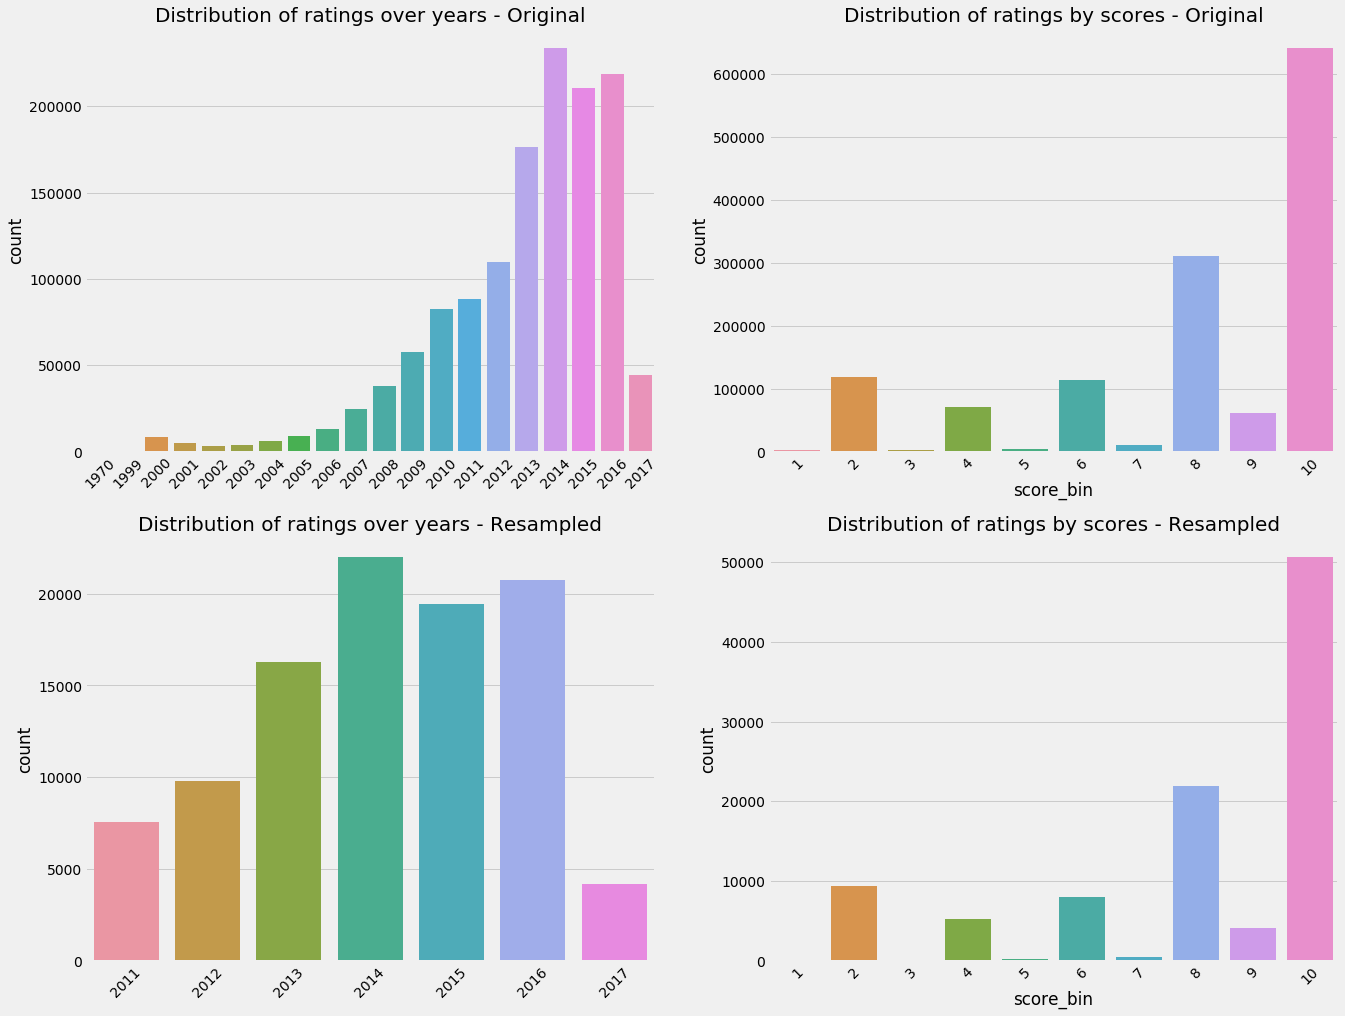

In [47]:
fig,ax = plt.subplots(2,2,figsize=(20,16))
start_year = int(df['year'].min())
sampled_year = int(df_new['year'].min())

sns.countplot(np.sort(df['year']),ax=ax[0,0]).set_title("Distribution of ratings over years - Original",fontsize=20)
ax[0,0].set_xticklabels(np.sort(df['year'].unique()),rotation = 45)

sns.countplot(df['score_bin'],ax=ax[0,1]).set_title("Distribution of ratings by scores - Original",fontsize=20)
ax[0,1].set_xticklabels(ax[0,1].get_xticks()+1, rotation = 45)

sns.countplot(np.sort(df_new['year']),ax=ax[1,0]).set_title("Distribution of ratings over years - Resampled",fontsize=20)
ax[1,0].set_xticklabels(np.sort(df_new['year'].unique()),rotation = 45)

sns.countplot(df_new['score_bin'],ax=ax[1,1]).set_title("Distribution of ratings by scores - Resampled",fontsize=20)
ax[1,1].set_xticklabels(ax[1,1].get_xticks()+1, rotation = 45)

plt.show();



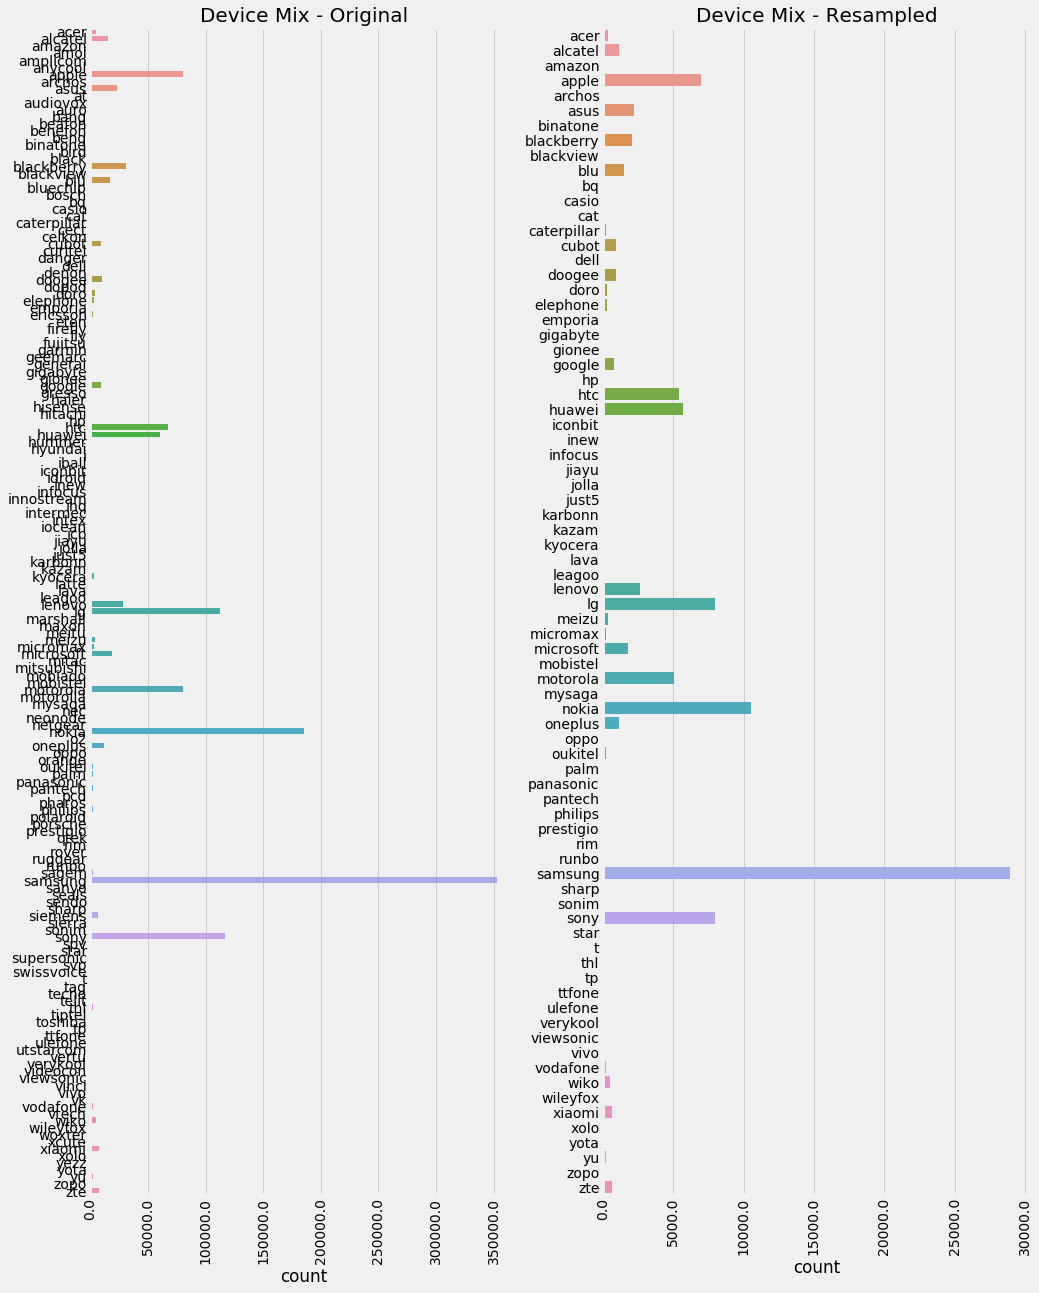

In [48]:
fig, ax = plt.subplots(1,2,figsize=(15,20)) 
sns.countplot(y=np.sort(df['brand']),ax=ax[0],orient='h').set_title("Device Mix - Original",fontsize=20)
ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 90)
sns.countplot(y=np.sort(df_new['brand']),ax=ax[1],orient='h').set_title("Device Mix - Resampled",fontsize=20)
ax[1].set_xticklabels(ax[1].get_xticks(), rotation = 90)
plt.show();

#### Observations:
1. Distribution has not changed significantly after sampling 

In [49]:
columns_to_retain = ['product_id','author','score_bin']

df_rec= pd.DataFrame(columns=['UserID','ProductID','Rating'])
df_rec[['ProductID','UserID','Rating']] = df_new[columns_to_retain].copy()
df_rec['Rating'] = df_rec['Rating'].astype('int64')
df_rec.head()

,UserID,ProductID,Rating
479761,Eva *gk*,lg-l70,2
35345,H. Noack,samsung-galaxy-s7-789999,10
792907,Unknown_7,alcatel-one-touch-992d,4
233807,S. FranÃ§ois,asus-zenfone-2-ze551ml,8
195493,Stevie,huawei-honor-6,10


In [50]:
df_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 479761 to 61370
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   UserID     100000 non-null  object
 1   ProductID  100000 non-null  object
 2   Rating     100000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ MB


In [51]:
train_data, test_data = sk_train_test_split(df_rec, test_size = test_size, random_state=random_state)
train_data.shape , test_data.shape

((80000, 3), (20000, 3))

### (6.1) Popularity based recommenders

#### Create a Class to hold attributes and methods for Popularity Based Recommender.
1. Recommender system below has a small chnage when compared to the conventional method.
2. In addition to the considering just the number of times the phone was reviewed, we also will use the average rating that phone has received.
3. Scale both `Count` and `Mean`.
4. Get the product of `count` and `Mean`.
5. Rank the product.

In [99]:
class PopularityRecommender():
    def __init__(self):
        # Initialise class variables 
        self.data = None
        self.userid = None
        self.itemid = None
        self.recommendations = None

    def fit(self,data,userid,itemid):
        # Assign values to class variables.
        self.data = data
        self.userid = userid
        self.itemid = itemid
        
        # Initializa the MinMaxScaler
        minmax_scaler = MinMaxScaler()
        
        #Group all items by mean of their ratings
        pop_mean = self.data.groupby(by=self.itemid).agg({'Rating':'mean'}).reset_index()
        
        # Scale the Mean.
        pop_mean['Rating'] = minmax_scaler.fit_transform(pop_mean[['Rating']])
        
        #Group all items by count of their ratings
        pop_count =  self.data.groupby(by=self.itemid).agg({'Rating':'count'}).reset_index()
        pop_count.rename(columns={'Rating':'Count'},inplace=True)
        pop_count['Count'] = minmax_scaler.fit_transform(pop_count[['Count']])

        self.recommendations = pop_mean.merge(pop_count,on=self.itemid,how='left')
        # Scaled Ratings X Count
        self.recommendations['RxC'] = self.recommendations['Rating'] * self.recommendations['Count']
        self.recommendations.sort_values(by='RxC',ascending=False,inplace=True)
        # Rank the Scaled values of Ratings  X Count
        self.recommendations['Rank'] = self.recommendations['RxC'].rank(ascending=False,method='first')
        return self.recommendations
        
    def suggest(self, userid,top_n=5):
        user_recommendataion = self.recommendations.head(top_n).copy()
        user_recommendataion['userid'] = userid
        cols = user_recommendataion.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendataion = user_recommendataion[cols]
        return user_recommendataion

In [100]:
top_n=5
pr = PopularityRecommender()
train_rank = pr.fit(train_data,'UserID','ProductID')
test_rank = pr.fit(test_data,'UserID','ProductID')

display(Markdown(f"<u><b>Top-{top_n} Phones in Training Data"))
display(train_rank.head(top_n))

display(Markdown(f"<u><b>Top-{top_n} Phones in Test Data"))
display(test_rank.head(top_n))


<u><b>Top-5 Phones in Training Data

,ProductID,Rating,Count,RxC,Rank
1392,samsung-galaxy-s7-edge,0.877821,0.925986,0.812850,1.0
1371,samsung-galaxy-s-iii,0.801547,1.000000,0.801547,2.0
1386,samsung-galaxy-s6,0.859821,0.900241,0.774047,3.0
1382,samsung-galaxy-s5,0.811841,0.914722,0.742609,4.0
923,motorola-moto-g,0.865303,0.849558,0.735124,5.0


<u><b>Top-5 Phones in Test Data

,ProductID,Rating,Count,RxC,Rank
1281,samsung-galaxy-s6,0.884303,0.993671,0.878706,1.0
1277,samsung-galaxy-s5,0.842972,1.000000,0.842972,2.0
1266,samsung-galaxy-s-iii,0.796532,0.990506,0.788970,3.0
849,motorola-moto-g,0.892145,0.860759,0.767922,4.0
77,apple-iphone-5s,0.820015,0.920886,0.755141,5.0


In [101]:
display(Markdown(f"## <center><u><b>Top-{top_n} Recommendations for Top-10 Users </br></br></br>"))

for users in top_users.index:
    display(Markdown(f"<u><b>Top-{top_n} Recommendations for `{users}`"))
    display(pr.suggest(users,5))

## <center><u><b>Top-5 Recommendations for Top-10 Users </br></br></br>

<u><b>Top-5 Recommendations for `Amazon Customer`

,userid,ProductID,Rating,Count,RxC,Rank
1281,Amazon Customer,samsung-galaxy-s6,0.884303,0.993671,0.878706,1.0
1277,Amazon Customer,samsung-galaxy-s5,0.842972,1.000000,0.842972,2.0
1266,Amazon Customer,samsung-galaxy-s-iii,0.796532,0.990506,0.788970,3.0
849,Amazon Customer,motorola-moto-g,0.892145,0.860759,0.767922,4.0
77,Amazon Customer,apple-iphone-5s,0.820015,0.920886,0.755141,5.0


<u><b>Top-5 Recommendations for `Cliente Amazon`

,userid,ProductID,Rating,Count,RxC,Rank
1281,Cliente Amazon,samsung-galaxy-s6,0.884303,0.993671,0.878706,1.0
1277,Cliente Amazon,samsung-galaxy-s5,0.842972,1.000000,0.842972,2.0
1266,Cliente Amazon,samsung-galaxy-s-iii,0.796532,0.990506,0.788970,3.0
849,Cliente Amazon,motorola-moto-g,0.892145,0.860759,0.767922,4.0
77,Cliente Amazon,apple-iphone-5s,0.820015,0.920886,0.755141,5.0


<u><b>Top-5 Recommendations for `e-bit`

,userid,ProductID,Rating,Count,RxC,Rank
1281,e-bit,samsung-galaxy-s6,0.884303,0.993671,0.878706,1.0
1277,e-bit,samsung-galaxy-s5,0.842972,1.000000,0.842972,2.0
1266,e-bit,samsung-galaxy-s-iii,0.796532,0.990506,0.788970,3.0
849,e-bit,motorola-moto-g,0.892145,0.860759,0.767922,4.0
77,e-bit,apple-iphone-5s,0.820015,0.920886,0.755141,5.0


<u><b>Top-5 Recommendations for `Unknown_4`

,userid,ProductID,Rating,Count,RxC,Rank
1281,Unknown_4,samsung-galaxy-s6,0.884303,0.993671,0.878706,1.0
1277,Unknown_4,samsung-galaxy-s5,0.842972,1.000000,0.842972,2.0
1266,Unknown_4,samsung-galaxy-s-iii,0.796532,0.990506,0.788970,3.0
849,Unknown_4,motorola-moto-g,0.892145,0.860759,0.767922,4.0
77,Unknown_4,apple-iphone-5s,0.820015,0.920886,0.755141,5.0


<u><b>Top-5 Recommendations for `Unknown_7`

,userid,ProductID,Rating,Count,RxC,Rank
1281,Unknown_7,samsung-galaxy-s6,0.884303,0.993671,0.878706,1.0
1277,Unknown_7,samsung-galaxy-s5,0.842972,1.000000,0.842972,2.0
1266,Unknown_7,samsung-galaxy-s-iii,0.796532,0.990506,0.788970,3.0
849,Unknown_7,motorola-moto-g,0.892145,0.860759,0.767922,4.0
77,Unknown_7,apple-iphone-5s,0.820015,0.920886,0.755141,5.0


<u><b>Top-5 Recommendations for `Unknown_6`

,userid,ProductID,Rating,Count,RxC,Rank
1281,Unknown_6,samsung-galaxy-s6,0.884303,0.993671,0.878706,1.0
1277,Unknown_6,samsung-galaxy-s5,0.842972,1.000000,0.842972,2.0
1266,Unknown_6,samsung-galaxy-s-iii,0.796532,0.990506,0.788970,3.0
849,Unknown_6,motorola-moto-g,0.892145,0.860759,0.767922,4.0
77,Unknown_6,apple-iphone-5s,0.820015,0.920886,0.755141,5.0


<u><b>Top-5 Recommendations for `Unknown_9`

,userid,ProductID,Rating,Count,RxC,Rank
1281,Unknown_9,samsung-galaxy-s6,0.884303,0.993671,0.878706,1.0
1277,Unknown_9,samsung-galaxy-s5,0.842972,1.000000,0.842972,2.0
1266,Unknown_9,samsung-galaxy-s-iii,0.796532,0.990506,0.788970,3.0
849,Unknown_9,motorola-moto-g,0.892145,0.860759,0.767922,4.0
77,Unknown_9,apple-iphone-5s,0.820015,0.920886,0.755141,5.0


<u><b>Top-5 Recommendations for `Unknown_5`

,userid,ProductID,Rating,Count,RxC,Rank
1281,Unknown_5,samsung-galaxy-s6,0.884303,0.993671,0.878706,1.0
1277,Unknown_5,samsung-galaxy-s5,0.842972,1.000000,0.842972,2.0
1266,Unknown_5,samsung-galaxy-s-iii,0.796532,0.990506,0.788970,3.0
849,Unknown_5,motorola-moto-g,0.892145,0.860759,0.767922,4.0
77,Unknown_5,apple-iphone-5s,0.820015,0.920886,0.755141,5.0


<u><b>Top-5 Recommendations for `Unknown_3`

,userid,ProductID,Rating,Count,RxC,Rank
1281,Unknown_3,samsung-galaxy-s6,0.884303,0.993671,0.878706,1.0
1277,Unknown_3,samsung-galaxy-s5,0.842972,1.000000,0.842972,2.0
1266,Unknown_3,samsung-galaxy-s-iii,0.796532,0.990506,0.788970,3.0
849,Unknown_3,motorola-moto-g,0.892145,0.860759,0.767922,4.0
77,Unknown_3,apple-iphone-5s,0.820015,0.920886,0.755141,5.0


<u><b>Top-5 Recommendations for `Unknown_8`

,userid,ProductID,Rating,Count,RxC,Rank
1281,Unknown_8,samsung-galaxy-s6,0.884303,0.993671,0.878706,1.0
1277,Unknown_8,samsung-galaxy-s5,0.842972,1.000000,0.842972,2.0
1266,Unknown_8,samsung-galaxy-s-iii,0.796532,0.990506,0.788970,3.0
849,Unknown_8,motorola-moto-g,0.892145,0.860759,0.767922,4.0
77,Unknown_8,apple-iphone-5s,0.820015,0.920886,0.755141,5.0


#### Observations:
1. Popularity recommender systems go by the <b>`most popular content/product`</b> recommendations. 
2. In this every user will be recommended with the same 5 phones as listed in the table "Top N Popular Items" above.
3. Personal prefernces of users are not considered and hence considered as a baseline recommender system.
4. Useful for new users whose data and purchase histories are unavailable.
5. As recommendations are not customizable per users preference, we need to use **Collaborative Filtering** recommendation systems.

### (6.2) Collaborative Filtering - Singular Value Decomposition (SVD) 

#### Read from the data frame into the `Reader` object of the `Surprise` library

In [55]:
from surprise.model_selection import train_test_split
reader = Reader(line_format=u'user item rating', rating_scale=(1,10))
data = Dataset.load_from_df(df_rec, reader)

In [56]:
data.raw_ratings[:5]

[('Eva *gk*', 'lg-l70', 2.0, None),
 ('H. Noack', 'samsung-galaxy-s7-789999', 10.0, None),
 ('Unknown_7', 'alcatel-one-touch-992d', 4.0, None),
 ('S. FranÃ§ois', 'asus-zenfone-2-ze551ml', 8.0, None),
 ('Stevie', 'huawei-honor-6', 10.0, None)]

In [57]:
trains = Dataset.load_from_df(train_data,reader)
trainset = trains.build_full_trainset()
tests = Dataset.load_from_df(test_data,reader)
# Assign all records to the test split
_, testset = train_test_split(tests, test_size=1.0,random_state=random_state)
display(f"Length of the test set is {len(testset)}")

'Length of the test set is 20000'

In [62]:
def plot_comparison(predictions,algo):
    
    predict_df = pd.DataFrame(predictions,columns=['UserID','ProductID','Actual Rating','Estimated Rating','Details'])
    ### Retain only those predictions for which users were found.
    predict_df['was_impossible'] = predict_df['Details'].apply(lambda x: np.nan if x['was_impossible'] == True else 1)
    predict_df.dropna(inplace=True)
    
    fig,ax = plt.subplots(1,2,figsize=(20,10))
    sns.histplot(predict_df['Actual Rating'],color='blue',alpha=0.7,ax=ax[0]).set_title(f"{algo} Actual Rating",fontsize=20)
    sns.histplot(predict_df['Estimated Rating'],color='red',alpha=0.7,ax=ax[1]).set_title(f"{algo} Estimated Rating",fontsize=20)
#     plt.legend(['Actual','Prediction']);
#     plt.title(f"{algo} Actual Vs Predictions")
#     plt.xlabel("Ratings");
    plt.show()


#### (a) SVD with default parameters

In [59]:
svd = SVD(random_state=random_state)
svd.fit(trainset)

svd_predictions = svd.test(testset)
svd_rmse = accuracy.rmse(svd_predictions)
clear_output(wait=True)
display(Markdown(f'''#### RMSE Score : <span style="color:blue"> {svd_rmse:.6f}</span>'''))


#### RMSE Score : <span style="color:blue"> 2.558797</span>

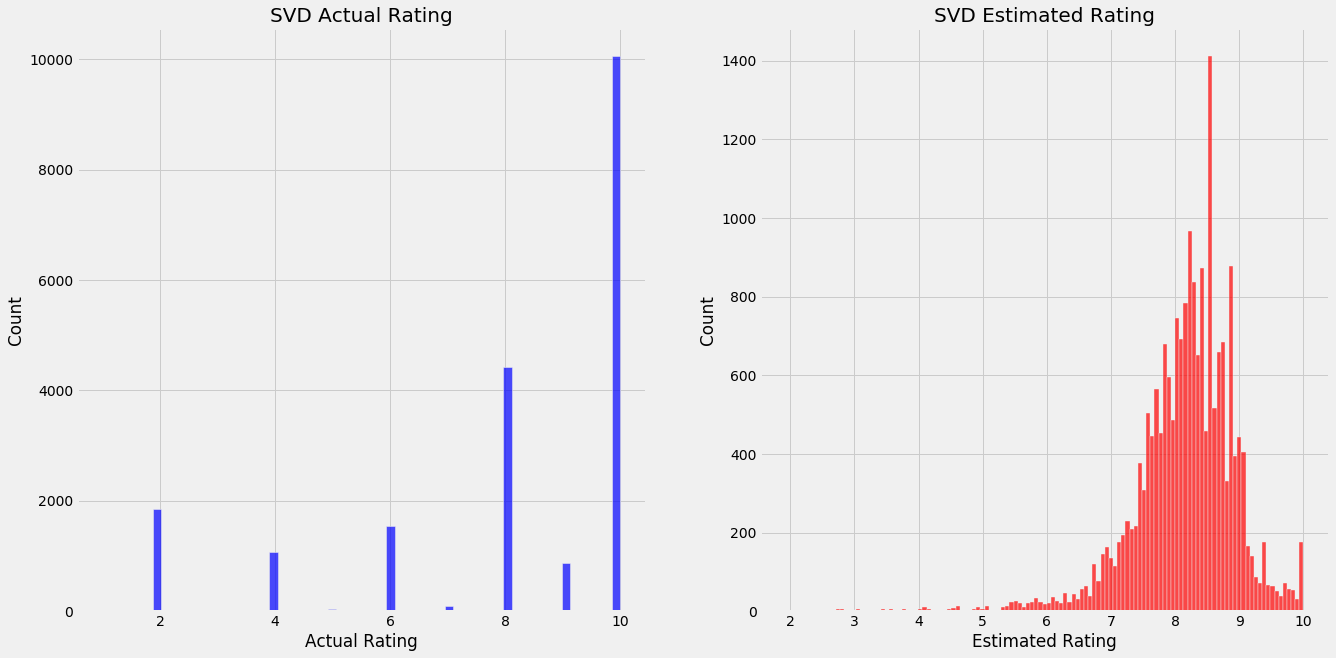

In [63]:
plot_comparison(svd_predictions,'SVD')

In [61]:
score_board = score_board.append({'Recommender': 'SVD','RMSE':svd_rmse,'Notes':'SVD with default parameters'},ignore_index=True)
score_board

,Recommender,RMSE,Notes
0,SVD,2.558797,SVD with default parameters


#### (b) SVD with tuned parameters

In [64]:
param_grid_svd = {'n_factors':[50,100,150],
              'n_epochs':[20,30],  
              'lr_all':[0.005,0.01],
              'reg_all':[0.02,0.1]}

gs_svd = GridSearchCV(SVD, param_grid_svd, measures=['rmse'], cv=3,n_jobs=-4,return_train_measures=True)
# gs_svd = RandomizedSearchCV(SVD, param_grid_svd, measures=['rmse'], cv=3,n_jobs=-4,return_train_measures=True)
gs_svd.fit(data)

clear_output(wait=True)
display(Markdown(f'''#### Best RMSE Score : <span style="color:blue"> {gs_svd.best_score['rmse']:.6f}</span>'''))
display(Markdown(f'''#### Best Params : <span style="color:blue"> {gs_svd.best_params['rmse']}</span>'''))

#### Best RMSE Score : <span style="color:blue"> 2.532029</span>

#### Best Params : <span style="color:blue"> {'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}</span>

In [65]:
params_svd_tuned = gs_svd.best_params['rmse']
svdtuned = SVD(**params_svd_tuned,random_state=random_state)
svdtuned.fit(trainset)
svdtuned_predictions = svdtuned.test(testset)
svdtuned_rmse = accuracy.rmse(svdtuned_predictions)


RMSE: 2.5321


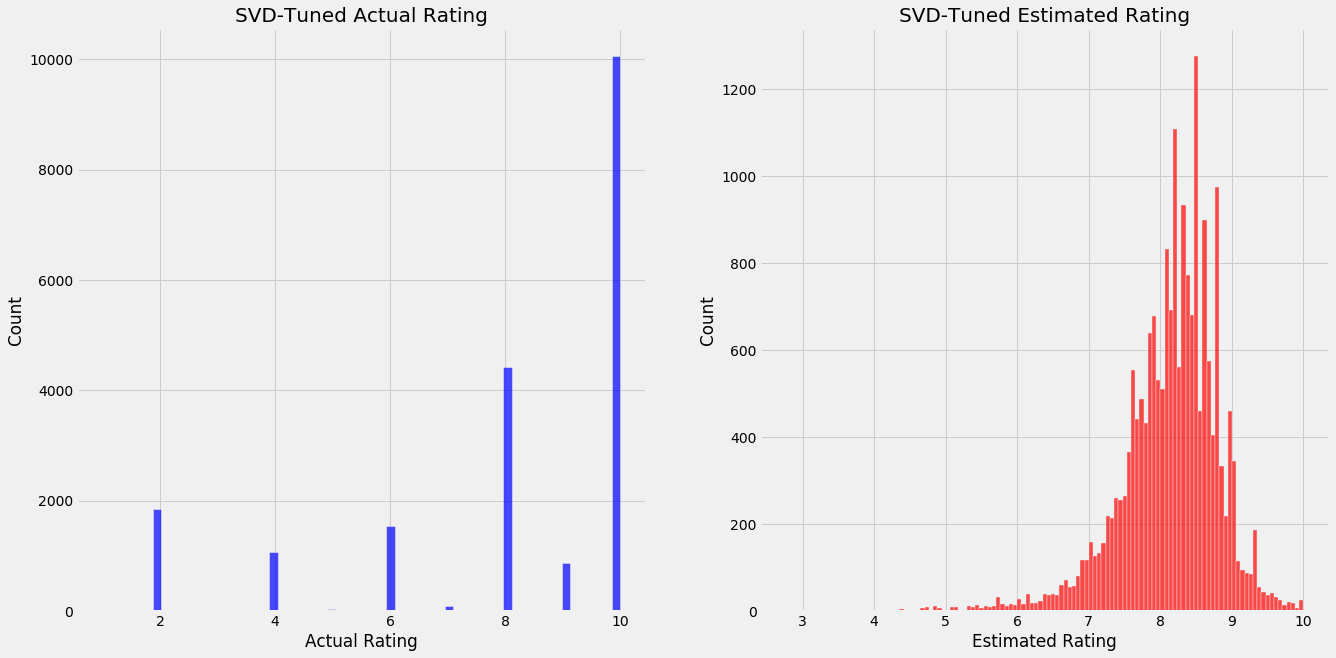

In [66]:
plot_comparison(svdtuned_predictions,'SVD-Tuned')

In [67]:
score_board = score_board.append({'Recommender': 'SVD-Tuned','RMSE':svdtuned_rmse,'Notes':f'SVD Tuned with {params_svd_tuned}'},ignore_index=True)
score_board

,Recommender,RMSE,Notes
0,SVD,2.558797,SVD with default parameters
1,SVD-Tuned,2.532139,"SVD Tuned with {'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}"


### (6.3) Collaborative Filtering - KNNwithMeans 

##### Note : <span style="color:red"> We will only use Item based filtering as user based is very `memory`  intensive and will kill the Jupyter Notebook Kernel </span>

In [68]:
param_grid_KNNWithMeans = {'k': [1000, 2000, 5000, 10000], 
                           'sim_options': {'name': ['pearson_baseline', 'cosine'], 
                                           'user_based': [False]}, 
                           'verbose': [True]}
gs_KNNWithMeans = GridSearchCV(KNNWithMeans, param_grid_KNNWithMeans, measures = ['rmse'], cv = 3,return_train_measures=True)
gs_KNNWithMeans.fit(data)
clear_output(wait=True)

display(Markdown(f'''#### Best RMSE Score : <span style="color:blue"> {gs_KNNWithMeans.best_score['rmse']:.6f}</span>'''))
display(Markdown(f'''#### Best Params : <span style="color:blue"> {gs_KNNWithMeans.best_params['rmse']}</span>'''))

#### Best RMSE Score : <span style="color:blue"> 2.618533</span>

#### Best Params : <span style="color:blue"> {'k': 2000, 'sim_options': {'name': 'cosine', 'user_based': False}, 'verbose': True}</span>

In [69]:
params_knnwithmeans = gs_KNNWithMeans.best_params['rmse']
knnwithmeans = KNNWithMeans(**params_knnwithmeans,random_state=random_state)
knnwithmeans.fit(trainset)
knnwithmeans_predictions = knnwithmeans.test(testset)
knnwithmeans_rmse = accuracy.rmse(knnwithmeans_predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.6156


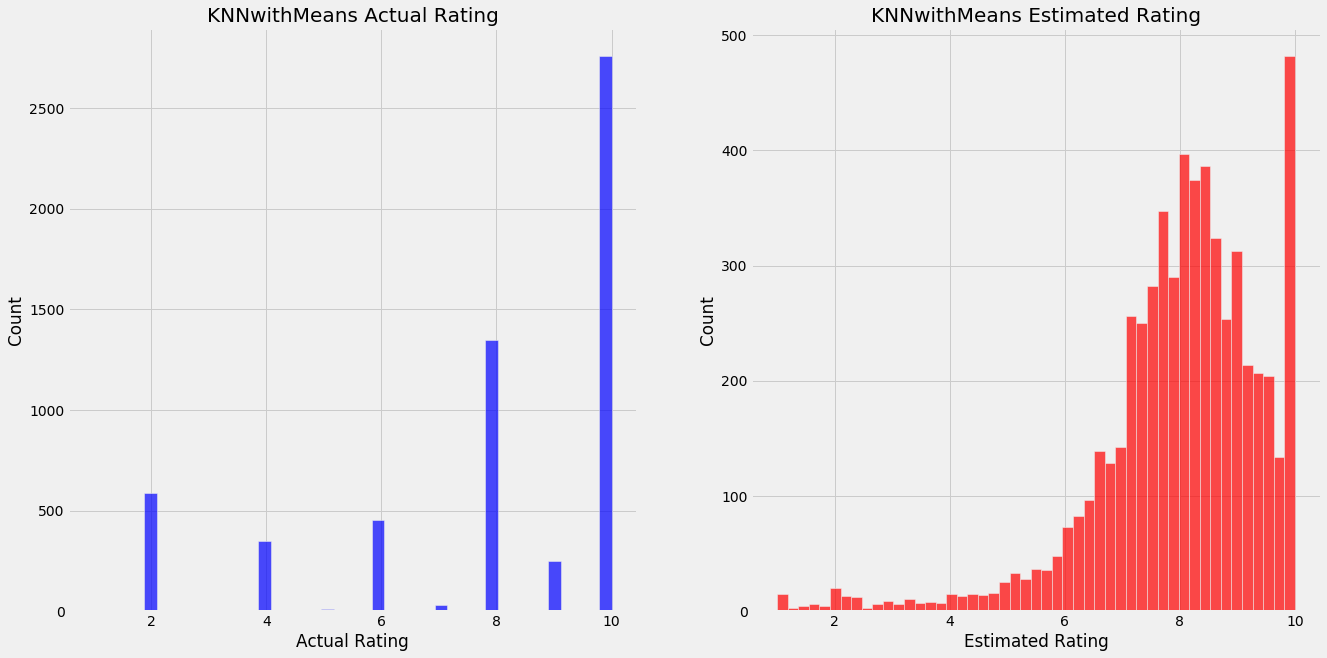

In [70]:
plot_comparison(knnwithmeans_predictions,'KNNwithMeans')

In [71]:
score_board = score_board.append({'Recommender': 'KNNwithMeans','RMSE':knnwithmeans_rmse,'Notes':f'KNNwithMeans Tuned with {params_knnwithmeans}'},ignore_index=True)
score_board

,Recommender,RMSE,Notes
0,SVD,2.558797,SVD with default parameters
1,SVD-Tuned,2.532139,"SVD Tuned with {'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}"
2,KNNwithMeans,2.615597,"KNNwithMeans Tuned with {'k': 2000, 'sim_options': {'name': 'cosine', 'user_based': False}, 'verbose': True}"


### (6.4) Collaborative Filtering - KNNBasic
##### Note : <span style="color:red"> We will only use Item based filtering as user based is very `memory`  intensive and will kill the Jupyter Notebook Kernel </span>

In [72]:
param_grid_KNNBasic = {'k': [1000, 2000, 5000, 10000], 
                           'sim_options': {'name': ['pearson_baseline', 'cosine'], 
                                           'user_based': [False]}, 
                           'verbose': [True]}
gs_KNNBasic = GridSearchCV(KNNBasic, param_grid_KNNBasic, measures = ['rmse'], cv = 3,return_train_measures=True)
gs_KNNBasic.fit(data)
clear_output(wait=True)

display(Markdown(f'''#### Best RMSE Score : <span style="color:blue"> {gs_KNNBasic.best_score['rmse']:.6f}</span>'''))
display(Markdown(f'''#### Best Params : <span style="color:blue"> {gs_KNNBasic.best_params['rmse']}</span>'''))

#### Best RMSE Score : <span style="color:blue"> 2.632407</span>

#### Best Params : <span style="color:blue"> {'k': 2000, 'sim_options': {'name': 'cosine', 'user_based': False}, 'verbose': True}</span>

In [73]:
params_knnbasic = gs_KNNBasic.best_params['rmse']
knnbasic = KNNBasic(**params_knnbasic,random_state=random_state)
knnbasic.fit(trainset)
knnbasic_predictions = knnbasic.test(testset)
knnbasic_rmse = accuracy.rmse(knnbasic_predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.6210


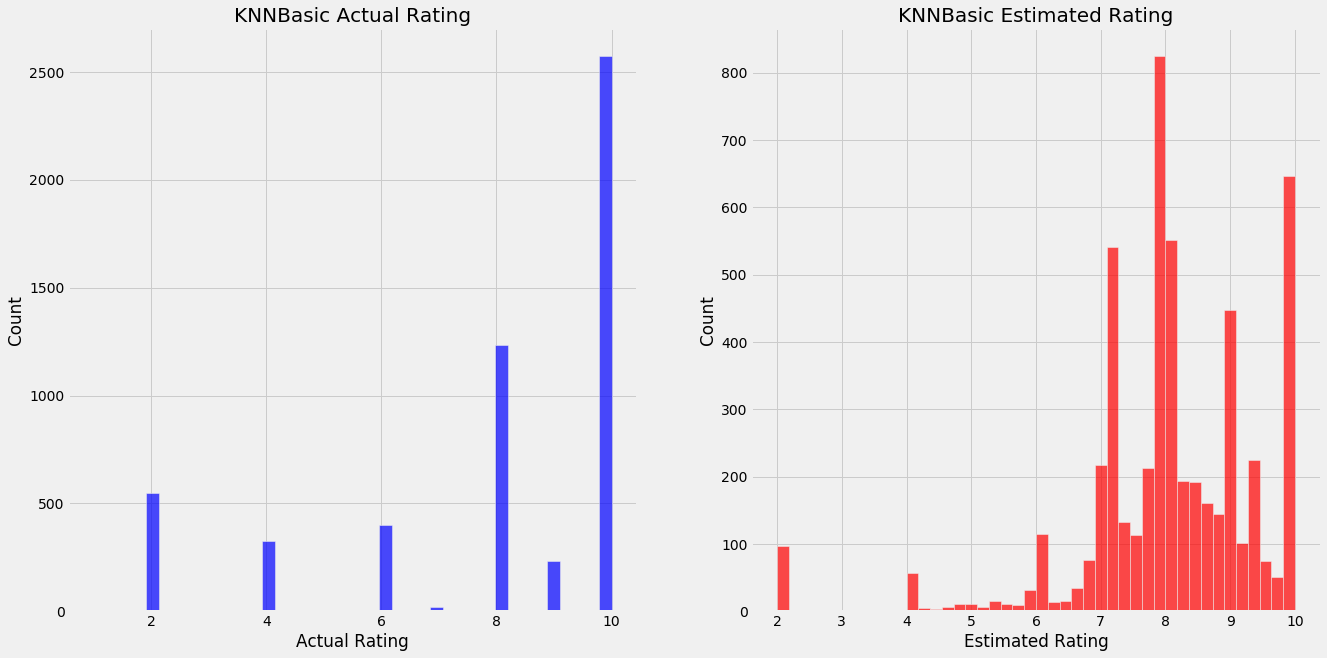

In [74]:
plot_comparison(knnbasic_predictions,'KNNBasic')

In [75]:
score_board = score_board.append({'Recommender': 'KNNBasic','RMSE':knnbasic_rmse,'Notes':f'KNNBasic Tuned with {params_knnbasic}'},ignore_index=True)
score_board

,Recommender,RMSE,Notes
0,SVD,2.558797,SVD with default parameters
1,SVD-Tuned,2.532139,"SVD Tuned with {'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}"
2,KNNwithMeans,2.615597,"KNNwithMeans Tuned with {'k': 2000, 'sim_options': {'name': 'cosine', 'user_based': False}, 'verbose': True}"
3,KNNBasic,2.621018,"KNNBasic Tuned with {'k': 2000, 'sim_options': {'name': 'cosine', 'user_based': False}, 'verbose': True}"


#### Observations:
1. As we can find from the score board that the `SVD-Tuned` has the best score.
2. We will use the `prediction` object of this model to predict Top-10 phones to users in the testset.

### (6.5) Recommend Top-5 phones to all test users

In [76]:
test_user_df = pd.DataFrame(testset,columns=['UserID','ProductID','Actual Rating'])
display(Markdown(f"##### There are {test_user_df['UserID'].nunique()} unique users in the test data set.")   )


##### There are 16368 unique users in the test data set.

#### Function to recommend Top-N items from the test set.

In [77]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

#### We will predict the Top-10 phones if possible based on SVD and list those users with more than 5 recommendations.

In [78]:
top_n = get_top_n(svd_predictions, n=10)

recc_df = pd.DataFrame(columns=['UserID','Recommendations','Size'])
for uid, user_ratings in top_n.items():
    iids = [iid for (iid, _) in user_ratings]
    recc_df = recc_df.append({'UserID':uid, 'Recommendations':iids,'Size':len(iids)},ignore_index=True)
    
recc_df[recc_df['Size'] >= 5]

,UserID,Recommendations,Size
21,Unknown_5,"[nokia-x2-00-358331, lenovo-p780, samsung-galaxy-s5, samsung-galaxy-s-ii-plus, samsung-galaxy-s-iii, huawei-ascend-y300, sony-xperia-go, sony-ericsson-xperia-arc, sony-ericsson-xperia-arc, nokia-6300]",10
24,einem Kunden,"[apple-iphone-6s-plus, apple-iphone-6s-plus, apple-iphone-6s-plus, apple-iphone-6s-plus, sony-xperia-xz, samsung-galaxy-a3-2016, samsung-galaxy-a3-2016, samsung-galaxy-s7-edge, samsung-galaxy-s7-edge, samsung-galaxy-s7-edge]",10
27,Amazon Customer,"[huawei-honor-6, cubot-x17, samsung-galaxy-s5-mini, blackberry-curve-9320, apple-iphone-4, huawei-honor-6, asus-zenfone-2, asus-zenfone-2, asus-zenfone-2, asus-zenfone-2]",10
33,Unknown_7,"[lg-optimus-l3-e405, samsung-gt-i8160, lg-optimus-l3-e405, lg-g3-d855-657484, samsung-gt-i8160, samsung-i9500-galaxy-s-iv, htc-incredible-s, samsung-wave-525-s5250, lg-e440-optimus-l4-ii, microsoft-lumia-435]",10
35,Cliente Amazon,"[samsung-i9500-galaxy-s-iv, asus-zenfone-selfie-zd551kl, samsung-galaxy-s-iii, apple-iphone-6s-plus, blackberry-priv, alcatel-onetouch-pop-3-5015d, huawei-ascend-mate-7, cubot-x15, cubot-x15, asus-zenfone-2-ze551ml]",10
...,...,...,...
5305,Alessandra,"[huawei-p8-lite, samsung-galaxy-s5, samsung-galaxy-s5, huawei-p8, samsung-galaxy-s-duos-s7562, htc-desire-516, samsung-galaxy-note-edge]",7
5377,Dave,"[google-nexus-5x-h791, huawei-ascend-y550, sony-xperia-z5-premium, lg-g4, htc-m8]",5
5420,ÐÐ°ÑÐ¸Ð½Ð°,"[sony-xperia-z1, samsung-galaxy-s6-edge-sm-g925f, samsung-s5611, asus-zenfone-3, lenovo-s660, samsung-galaxy-fame-s6810, sony-xperia-j, sony-xperia-m4]",8
5813,Fabrizio,"[asus-zenfone-2, asus-zenfone-2, samsung-galaxy-s6-edge-sm-g925f, htc-one-m7, ttfone-dual-2, sony-xperia-u-st25i]",6


### (6.6) Neighbourhood Analysis
#### Let's take an example of a user `Amazon Customer` and try to predict Top-10 items based on KNNBasic method.

In [79]:
top_n = get_top_n(knnbasic_predictions, n=10)

recc_df = pd.DataFrame(columns=['UserID','Recommendations','Size'])
for uid, user_ratings in top_n.items():
    iids = [iid for (iid, _) in user_ratings]
    recc_df = recc_df.append({'UserID':uid, 'Recommendations':iids,'Size':len(iids)},ignore_index=True)
    
recc_df[recc_df['Size'] >= 5]
# recc_df

,UserID,Recommendations,Size
21,Unknown_5,"[lg-env-touch-vx-11000, sony-xperia-m2-aqua-d2403, blackberry-torch-9800, samsung-s8000-jet, samsung-galaxy-s-iii, sony-xperia-z1-compact-d5503, samsung-gt-e1270, nokia-x2-00-358331, sony-xperia-go, nokia-5800-xpressmusic-tube]",10
24,einem Kunden,"[samsung-galaxy-a3-2016, samsung-galaxy-a3-2016, apple-iphone-6s-plus, apple-iphone-6s-plus, apple-iphone-6s-plus, apple-iphone-6s-plus, apple-iphone-7, apple-iphone-7, samsung-galaxy-s7-edge, samsung-galaxy-s7-edge]",10
27,Amazon Customer,"[samsung-sch-s380, alcatel-382g, lenovo-s860, huawei-prism-ii, pantech-discover, samsung-galaxy-s-relay-4g, lg-spirit-4g, samsung-transform-ultra, htc-droid-eris, blu-studio-5-5s]",10
33,Unknown_7,"[samsung-sgh-e250, samsung-sgh-j700, alcatel-onetouch-2012d, alcatel-idol-x, alcatel-one-touch-992d, nokia-e52, nokia-e52, htc-evo-3d, samsung-galaxy-pro-b7510, samsung-wave-723-gt-s7230e]",10
35,Cliente Amazon,"[samsung-g355-galaxy-core-ii, huawei-ascend-g525, lg-k500n, blu-win-jr, samsung-e1150, samsung-galaxy-trend-lite-gt-s7390, samsung-galaxy-grand-prime-ve-sm-g531f, sony-xperia-z5-premium, samsung-galaxy-s3-mini, samsung-galaxy-s3-mini]",10
...,...,...,...
5305,Alessandra,"[huawei-p8, huawei-p8-lite, samsung-galaxy-s-duos-s7562, samsung-galaxy-s5, samsung-galaxy-s5, samsung-galaxy-note-edge, htc-desire-516]",7
5377,Dave,"[google-nexus-5x-h791, lg-g4, sony-xperia-z5-premium, htc-m8, huawei-ascend-y550]",5
5420,ÐÐ°ÑÐ¸Ð½Ð°,"[samsung-s5611, asus-zenfone-3, lenovo-s660, sony-xperia-j, samsung-galaxy-s6-edge-sm-g925f, sony-xperia-z1, samsung-galaxy-fame-s6810, sony-xperia-m4]",8
5813,Fabrizio,"[htc-one-m7, ttfone-dual-2, sony-xperia-u-st25i, asus-zenfone-2, asus-zenfone-2, samsung-galaxy-s6-edge-sm-g925f]",6


In [80]:
recc_df[recc_df['UserID'] == 'Amazon Customer']

,UserID,Recommendations,Size
27,Amazon Customer,"[samsung-sch-s380, alcatel-382g, lenovo-s860, huawei-prism-ii, pantech-discover, samsung-galaxy-s-relay-4g, lg-spirit-4g, samsung-transform-ultra, htc-droid-eris, blu-studio-5-5s]",10


#### David has been recommended with <span style="color:blue">*samsung-sch-s380, alcatel-382g, lenovo-s860, huawei-prism-ii, pantech-discover, samsung-galaxy-s-relay-4g, lg-spirit-4g, samsung-transform-ultra, htc-droid-eris, blu-studio-5-5s*</span> phones 

In [82]:
train_select_high = train_data[(train_data['UserID'] == 'Amazon Customer') & (train_data['Rating'] >= 8) ]
train_select_total = train_data[(train_data['UserID'] == 'Amazon Customer')]
display(Markdown(f"###### Amazon Customer has rated `{len(train_select_high)}` phones between 8 to 10 out of `{len(train_select_total)}` in the trainset "))



###### Amazon Customer has rated `1372` phones between 8 to 10 out of `2371` in the trainset 

#### List of all phones rated by `Amazon Customer` in the train set .

In [83]:
train_data[(train_data['UserID'] == 'Amazon Customer')].sort_values(by='Rating',ascending=False)

,UserID,ProductID,Rating
531277,Amazon Customer,apple-iphone-5s,10
486698,Amazon Customer,xiaomi-mi-4i,10
507395,Amazon Customer,lenovo-vibe-k5,10
43443,Amazon Customer,apple-iphone-6s,10
22316,Amazon Customer,apple-iphone-6s-plus,10
...,...,...,...
587304,Amazon Customer,htc-desire-816,2
976759,Amazon Customer,lg-extravert,2
360871,Amazon Customer,motorola-moto-g4,2
567765,Amazon Customer,blu-win-hd,2


#### List of all items rated in the test set.

In [84]:
test_data[(test_data['UserID'] == 'Amazon Customer') & (test_data['Rating'] == 10) ].sort_values(by='Rating',ascending=False)


,UserID,ProductID,Rating
296531,Amazon Customer,htc-one-a9-16gb,10
631296,Amazon Customer,lava-iris-x1,10
547047,Amazon Customer,oneplus-two,10
558077,Amazon Customer,micromax-canvas-a1,10
847816,Amazon Customer,apple-iphone-5,10
...,...,...,...
303312,Amazon Customer,asus-zenfone-2,10
211230,Amazon Customer,blackberry-passport,10
549838,Amazon Customer,nokia-130,10
262701,Amazon Customer,apple-iphone-6,10


In [85]:
phone_iid = knnbasic.trainset.to_inner_iid('apple-iphone-5s')
neighbours = knnbasic.get_neighbors(phone_iid,k=20)
for i in neighbours:
    print(knnbasic.trainset.to_raw_iid(i))

htc-hero
lg-p920-optimus-3d
acer-liquid-s100
htc-desire-310
sony-ericsson-t700
doogee-dagger-dg550
htc-dlx
lg-d820
lg-optimus-l9-ii
lg-optimus-l1-ii-e420
samsung-c3350
nokia-100
micromax-canvas-turbo-a250
lg-optimus-l3-ii-dual-e435
samsung-galaxy-ace-plus
htc-desire-601
asus-zenfone-4
alcatel-onetouch-2012d
lg-elite-ls696
samsung-b5722


#### Phone `apple-iphone-5s` has the above 20 nearest neighbors  or similar phone in terms of reviews.

In [86]:
user_uid = knnbasic.trainset.to_inner_uid('Amazon Customer')
neighbours = knnbasic.get_neighbors(user_uid,k=20)
for i in neighbours:
    print(knnbasic.trainset.to_raw_uid(i))

ÐÐ°ÑÐ°Ð»ÑÑ
Ederson Luis GonÃ§alves Barboza
hyounis
George
Voordeel Auto's
ÐÐ°ÑÐ¸Ð»Ð¸Ð¹
Robert H
Kamau
zambini87
Jan, Praha
anuj Sinha
Ajayalal
anyela ortega
d_rich22
susana martin
SpaÃ
o.ryabalko
Elder Gadotti
dirkjessi
MARYALONSO63


#### User `Amazon Customer` has the above 20 nearest neighbors or similar users in terms of reviews.

## (7) Conclusion:
1. The dataset has `5556` models across `166` brands of phones.
2. The dataset has been collected over `18 years` between `1999 to 2017` from `384 domains`.
3. `Samsung` by far is the popular brand.
4. `Tuned SVD` model has the best RMSE of `2.529`.
### Bussiness Scenarios:
1. `Popularity` based recommenders are beneficial especially for `Day 1` scenrios when the user has just begun using the app i.e the browsing history of the user is not known. As the browsing history builds up, then we would switch to other types of recommenders.
2. `Collaborative Filtering (CF)` based recommender systems are best applied once a fair amount of data on users interests or browsing history is known. CF provides personalised recommendations based on either similarities between users i.e user-user similarity or item-item similarity.
3. Other type of Collaborative Filetring is SVD that yields a better result by employing user-item similarity.
### Suggested Improvements:
1. Then model could further be improved if other features are also included such as phone specifications etc.
2. Finding similarity in phone specifications increases the relevance of the recommendations.
3. Popularity based recommendations can be improved by even considering the `count` instead of just `recommendations`. i.e Rank(Scaled Mean-Rating X Scaled Count).
 